<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Describe the target value (select specific target column where you can use two different basic ML models)</li>
<li>Select is it classification or regression problem</li>
<li>Build two basic models (KNN/Logistic Regression/Linear Regression/Polynomial) depending on the problem</li>
<li>Evaluate both models on the same test dataset</li>
<li>Compare the results</li>
</ul>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/tunguz/us-elections-dataset
1.  https://www.kaggle.com/andrewmvd/heart-failure-clinical-data
2.  https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
3.  https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction
4.  https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
5.  https://www.kaggle.com/anmolkumar/house-price-prediction-challenge
6.  https://www.kaggle.com/datasets/tadhgfitzgerald/fifa-international-soccer-mens-ranking-1993now
7.  https://www.kaggle.com/arslanali4343/real-estate-dataset
8.  https://www.kaggle.com/terenceshin/covid19s-impact-on-airport-traffic
9.  https://www.kaggle.com/arslanali4343/top-personality-dataset







# Obtaining the dataset


In [2]:
import pandas as pd

ds=pd.read_csv('/content/drive/MyDrive/fifa_ranking.csv')

In [3]:
ds

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07


In [4]:
for column in ds.columns:
 print(ds[column].unique().size)


209
216
216
11114
1557
121
7419
7419
7473
7001
7575
6513
7628
5849
6
286


In [5]:
(ds['rank_change']== 0).sum()

15453

# Describe the target column


The target column I chose is rank_change, it is a continuous variable with distribution close to the normal distribution and has 121 unique values

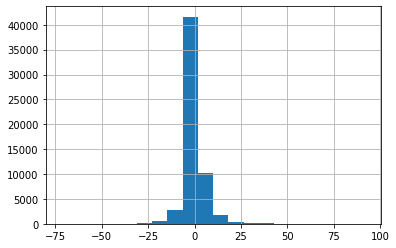

In [6]:
ds['rank_change'].hist(bins=20)

In [7]:
ds['rank_change'].describe()

count    57793.000000
mean        -0.009897
std          5.804309
min        -72.000000
25%         -2.000000
50%          0.000000
75%          1.000000
max         92.000000
Name: rank_change, dtype: float64

In [8]:
ds.isnull().sum()


rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

# If it is a classification or regression problem 

Since the target variable is continuous, the problem is regression.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# let's do a pairplot to visualize which variables are correlated with Sales the most

sns.pairplot(ds)

Error in callback <function flush_figures at 0x7f26df4f3a60> (for post_execute):


KeyboardInterrupt: ignored

# Data preparation

In [10]:
copy_ds = ds.copy()

In [11]:
copy_ds.drop('country_full',axis='columns',inplace=True)

In [12]:
copy_ds.drop('confederation',axis='columns',inplace=True)

In [13]:
#since the weighted columns have the same relationship, we don't need them
for column in ds.columns:
  if column.endswith("weighted"):
     copy_ds.drop(column,axis='columns',inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()
copy_ds['country_abrv'] = encoder.fit_transform(copy_ds['country_abrv'])

In [16]:
encoder1 = LabelEncoder()
copy_ds['rank_date'] = encoder1.fit_transform(copy_ds['rank_date'])

In [17]:
copy_ds

,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,last_year_avg,two_year_ago_avg,three_year_ago_avg,rank_date
0,1,73,0.0,57,0,0.0,0.0,0.0,0.0,0
1,2,94,0.0,57,0,0.0,0.0,0.0,0.0,0
2,3,177,0.0,50,9,0.0,0.0,0.0,0.0,0
3,4,181,0.0,55,0,0.0,0.0,0.0,0.0,0
4,5,7,0.0,51,5,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
57788,206,1,0.0,0,1,0.0,0.0,0.0,0.0,285
57789,206,15,0.0,0,1,0.0,0.0,0.0,0.0,285
57790,206,62,0.0,0,1,0.0,0.0,0.0,0.0,285
57791,206,172,0.0,0,1,0.0,0.0,0.0,0.0,285


# Building two models

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    copy_ds,  copy_ds['rank_change'], test_size=0.2)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model1 = LinearRegression()

In [21]:
model1.fit(X_train,Y_train)

LinearRegression()

In [39]:
y_pred = model1.predict(X_test)

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(Y_test,y_pred)

1.0

In [ ]:
#smaller dataset for kernelRidge

In [34]:
k = copy_ds.iloc[:100,:]

In [35]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, Y_train2, Y_test2 = train_test_split(
    k,  k['rank_change'], test_size=0.2)

In [26]:
from sklearn.kernel_ridge import KernelRidge

In [27]:
model2 = KernelRidge(alpha=0.05)

In [36]:
model2.fit(X_train2,Y_train2)

KernelRidge(alpha=0.05)

In [41]:
#linear regression on the smaller dataset
bonus = LinearRegression()
bonus.fit(X_train2,Y_train2)
y_predB = bonus.predict(X_test2)

# Evaluating the models

In [37]:
y_pred2 = model2.predict(X_test2)

In [38]:
r2_score(Y_test2,y_pred2)

0.999999999972888

In [42]:
r2_score(Y_test2,y_predB)

1.0

According to r2 score, the linear regression model is a little bit better than the kernelRidge model for the prediction of this variable.